In [1]:
import utils
import numpy as np
from tqdm.auto import tqdm
import scipy.sparse as sps
import matplotlib.pyplot as plt
from recommenders.mf import MatrixFactorization
%matplotlib inline

In [2]:
x = sps.load_npz('./data/train.npz')
y = sps.load_npz('./data/test.npz')
_y = y.tocsr()

In [3]:
K = 10

In [4]:
# after 200-250 iterations, test error increases
# see mf_grid_search.ipynb for grid search results for gamma param 
recommender = MatrixFactorization(K=100, iterations=200, gamma=0.3)

  0%|          | 0/200 [00:00<?, ?it/s]

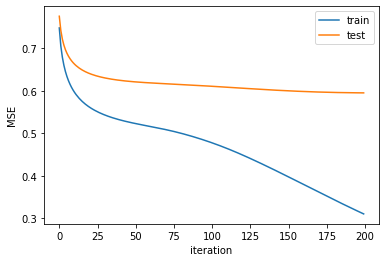

In [5]:
e_train, e_test = recommender.train(x, y)
plt.plot(e_train, label="train")
plt.plot(e_test, label="test")
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()
recommender.save("checkpoint.model")

In [13]:
e_test[-1]

0.5953396144109981

In [6]:
recommender.load("checkpoint.model")

## Rating-only based recommendations

In [7]:
precision_scores = []
recall_scores = []
ndcg_scores = []
for i in tqdm(range(y.shape[0])):
    topk = recommender.recommend(k=K, user=i, pop_weighted=False)
    actual = _y[i]
    precision_scores.append(utils.precision_at_k(topk, actual))
    recall_scores.append(utils.recall_at_k(topk, actual))
    ndcg_scores.append(utils.ndcg_at_k(topk, actual))
print(f'AVG. PRECISION@{K}: ', np.mean(precision_scores))
print(f'AVG. RECALL@{K}: ', np.mean(recall_scores))
print(f'AVG. NDCG@{K}: ', np.mean(ndcg_scores))

  0%|          | 0/68401 [00:00<?, ?it/s]

AVG. PRECISION@10:  0.003324512799520475
AVG. RECALL@10:  0.0015022919216569647
AVG. NDCG@10:  0.01084362200531084


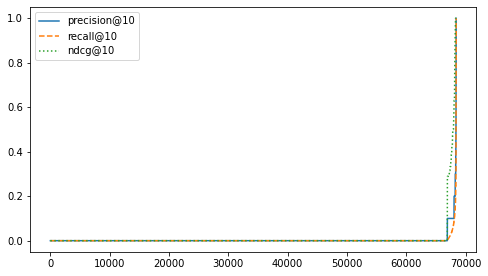

In [8]:
plt.figure(figsize=(8, 4.5))
plt.plot(sorted(precision_scores), label=f"precision@{K}")
plt.plot(sorted(recall_scores), label=f"recall@{K}",linestyle='dashed')
plt.plot(sorted(ndcg_scores), label=f"ndcg@{K}", linestyle='dotted')
plt.legend()
plt.show()

## Weighted rating + popularity based recommendations

In [9]:
precision_scores = []
recall_scores = []
ndcg_scores = []
for i in tqdm(range(y.shape[0])):
    topk = recommender.recommend(k=K, user=i, pop_weighted=True)
    actual = _y[i]
    precision_scores.append(utils.precision_at_k(topk, actual))
    recall_scores.append(utils.recall_at_k(topk, actual))
    ndcg_scores.append(utils.ndcg_at_k(topk, actual))
print(f'AVG. PRECISION@{K}: ', np.mean(precision_scores))
print(f'AVG. RECALL@{K}: ', np.mean(recall_scores))
print(f'AVG. NDCG@{K}: ', np.mean(ndcg_scores))

  0%|          | 0/68401 [00:00<?, ?it/s]

AVG. PRECISION@10:  0.03531819710238154
AVG. RECALL@10:  0.034732371405519234
AVG. NDCG@10:  0.12657753607012115


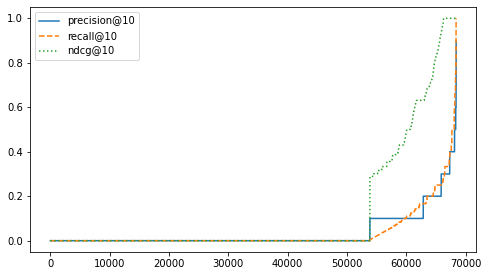

In [10]:
plt.figure(figsize=(8, 4.5))
plt.plot(sorted(precision_scores), label=f"precision@{K}")
plt.plot(sorted(recall_scores), label=f"recall@{K}",linestyle='dashed')
plt.plot(sorted(ndcg_scores), label=f"ndcg@{K}", linestyle='dotted')
plt.legend()
plt.show()

## Similarity based recommendations

In [11]:
precision_scores2 = []
recall_scores2 = []
ndcg_scores2 = []
for i in tqdm(range(y.shape[0])):
    topk = recommender.recommend_sim(k=K, user=i)
    actual = _y[i]
    precision_scores2.append(utils.precision_at_k(topk, actual))
    recall_scores2.append(utils.recall_at_k(topk, actual))
    ndcg_scores2.append(utils.ndcg_at_k(topk, actual))
print(f'AVG. PRECISION@{K}: ', np.mean(precision_scores2))
print(f'AVG. RECALL@{K}: ', np.mean(recall_scores2))
print(f'AVG. NDCG@{K}: ', np.mean(ndcg_scores2))

  0%|          | 0/68401 [00:00<?, ?it/s]

AVG. PRECISION@10:  0.0724945541731846
AVG. RECALL@10:  0.09789262638939897
AVG. NDCG@10:  0.22987081693581288


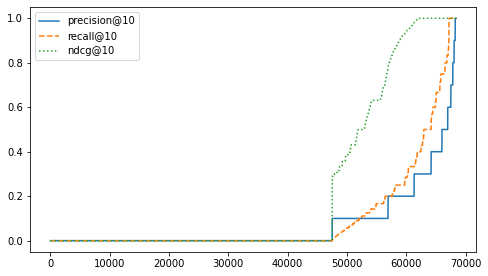

In [12]:
plt.figure(figsize=(8, 4.5))
plt.plot(sorted(precision_scores2), label=f"precision@{K}")
plt.plot(sorted(recall_scores2), label=f"recall@{K}",linestyle='dashed')
plt.plot(sorted(ndcg_scores2), label=f"ndcg@{K}", linestyle='dotted')
plt.legend()
plt.show()